### Part a

In [8]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('framingham_train.csv')
df_test = pd.read_csv('framingham_test.csv')
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2560 non-null   int64  
 1   age              2560 non-null   int64  
 2   education        2560 non-null   object 
 3   currentSmoker    2560 non-null   int64  
 4   cigsPerDay       2560 non-null   int64  
 5   BPMeds           2560 non-null   int64  
 6   prevalentStroke  2560 non-null   int64  
 7   prevalentHyp     2560 non-null   int64  
 8   diabetes         2560 non-null   int64  
 9   totChol          2560 non-null   int64  
 10  sysBP            2560 non-null   float64
 11  diaBP            2560 non-null   float64
 12  BMI              2560 non-null   float64
 13  heartRate        2560 non-null   int64  
 14  glucose          2560 non-null   int64  
 15  TenYearCHD       2560 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 320.1+ KB


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,41,Some high school,1,43,0,0,1,0,306,199.0,106.0,38.75,100,75,0
1,0,38,High school/GED,1,15,0,0,0,0,176,110.0,80.0,24.03,100,113,0
2,1,42,High school/GED,1,9,0,0,0,0,205,110.0,73.0,22.40,61,66,0
3,0,42,High school/GED,0,0,0,0,1,0,263,150.0,88.0,23.68,96,78,0
4,0,53,High school/GED,0,0,0,0,1,0,272,146.0,89.0,25.50,73,67,0


In [9]:
import statsmodels.formula.api as smf
logreg = smf.logit(formula = 'TenYearCHD ~ male + age + education + currentSmoker + cigsPerDay + BPMeds + prevalentStroke + prevalentHyp + diabetes + totChol + sysBP + diaBP + BMI + heartRate + glucose',
                  data=df_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.365281
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2560
Model:                          Logit   Df Residuals:                     2542
Method:                           MLE   Df Model:                           17
Date:                Thu, 05 Oct 2023   Pseudo R-squ.:                  0.1331
Time:                        18:44:06   Log-Likelihood:                -935.12
converged:                       True   LL-Null:                       -1078.7
Covariance Type:            nonrobust   LLR p-value:                 5.181e-51
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                 

i) The fitted logistic regression model is $${Pr}(\text{TenYearCHD} = 1 | \text{X}) = \frac{1}{1 + e^{-(-9.274-0.105 \text{High school/GED}-0.102 \text{Some college/vocational school} + 0.061\text{Some high school} + 0.562\text{male} + 0.069\text{age} + 0.154\text{currentSmoker} + 0.016\text{cigsPerDay} + 0.153\text{BPMeds} + 0.821\text{prevalentStroke} + 0.208\text{prevalentHyp} -0.298\text{diabetes} + 0.002\text{totChol} + 0.018\text{sysBP} -0.005\text{diaBP} + 0.014\text{BMI} - 0.005\text{heartRate} + 0.010\text{glucose})}}$$

ii) From the coefficients in the model we can see that the variable `prevalentStroke` has the highest positive coefficient and `diabetes` has the lowest negative coefficient. It means that a person previously had a stroke or currently has diabetes will result in a higher probability of developing CHD within the next 10 years. For example, for every increase of 1 in `prevalentStroke` (keeping other variables the same), odds of developing CHD within the next 10 years is multiplied by $e^{0.821} = 2.273$.

iii) $$\text{Expected Cost of CHD Without Medication} = p×700,000$$ $$\text{Expected Cost of No CHD Without Medication} = 0$$ $$\text{Expected Cost of CHD with Medication} = 0.15p×775,000$$ $$\text{Expected Cost of No CHD with Medication} = (1-0.15p)×75,000$$ We want the cost of taking medication is lower than the cost of not taking medication, which is Expected Cost with Medication less than Expected Cost Without Medication: $0.15p×775,000 + (1-0.15p)×75,000 < p×700,000 + 0$ solve $p > 0.126$. So the $\bar{p} = 0.126$.

In [10]:
y_prob = logreg.predict(df_test)
y_pred = pd.Series([1 if x > 0.126 else 0 for x in y_prob], index=y_prob.index)

In [11]:
from sklearn.metrics import confusion_matrix
y_test = df_test['TenYearCHD']
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[569 354]
 [ 56 119]]


iv) $Accuracy = \frac{569+119}{569+119+56+354} = 0.63$, $TPR = \frac{119}{119+56} = 0.68$, $FPR = \frac{354}{354+569} = 0.38$. The proportion of CHD that we correctly classified is 0.84, the proportion of the person really getting CHD that we correctly identified will develop CHD is 0.68, and the proportion of the person who don't really get CHD but we incorrectly identified will develop CHD is 0.38. 

v) From the model we can see that the model predicts 569 True Negative, 354 False Positive, 56 False Negative, and 119 True Positve. Using the strategy implied by the model, the patients is prescribed the medication if he or she is predicted to be 1 and not prescribed the medication if he or she is predicted to be 0. So the total expected cost will be: $119 \times 775,000 + 354 \times 75,000 + 56 \times 700,000 + 569 \times 0 = 157,975,000$. Total observation is $569 + 354 + 56 + 119 = 1098$. So the estimate for the expected economic cost per patient is $\frac{157,975,000}{1098} = 143,875.23$. We calculate this estimate for the expected economic cost is under the assuption that the CHD outcomes are not affected by the treatment decision. In reality, however, patients may experience a reduced risk of CHD after receiving the medication, so this assumption is not reasonable. \
If we consider the fact that the treatment decision impacts a patient’s risk of developing CHD, then the total estimated expected cost is needed to consider p, so out of 119 TP, only $119\times 0.15$ will develop CHD. So the total expectied cost will be $119 \times 0.15 \times 775,000 + 119 \times 0.85 \times 75,000  + 354 \times 75,000 + 56 \times 700,000 + 569 \times 0 = 87,170,000$. So the estimate for the expected economic cost per patient is $\frac{87,170,000}{1098} = 79,389.80$.

In [12]:
y_pred_baseline = np.zeros(1098)
cm2 = confusion_matrix(y_test, y_pred_baseline)
print ("Confusion Matrix : \n", cm2) 

Confusion Matrix : 
 [[923   0]
 [175   0]]


vi) For the baseline model, we predict all patients get 0 outcome. From the confusion matrix above we can see, the True Positives and False Positives are 0, while the True Negatives is 923 and False Negatives is 175. $Accuracy = \frac{923+0}{923+175+0+0} = 0.84$, $TPR = \frac{0}{0+175} = 0$, $FPR = \frac{0}{0+923} = 0$. Expected economic cost per patient $=\frac{700,000\times 175 + 0\times 923}{1098} = 111,566.48$.

In [13]:
d = {'male':[0], 'age':[45], 'education':['College'], 'currentSmoker':[1], 'cigsPerDay':[9], 'BPMeds':[1],
    'prevalentStroke':[1], 'prevalentHyp':[0], 'diabetes':[1], 'totChol':[220], 'sysBP':[140], 'diaBP':[100],
    'BMI':[33], 'heartRate':[69], 'glucose':[74]}
d = pd.DataFrame(d)
logreg.predict(d)[0]

0.1372127503664753

vii) This patient will experience CHD in the next ten years is 0.137, which is grater than the threshold (0.126), so the physician should prescribe the preventive medication for this patient.

### Part b

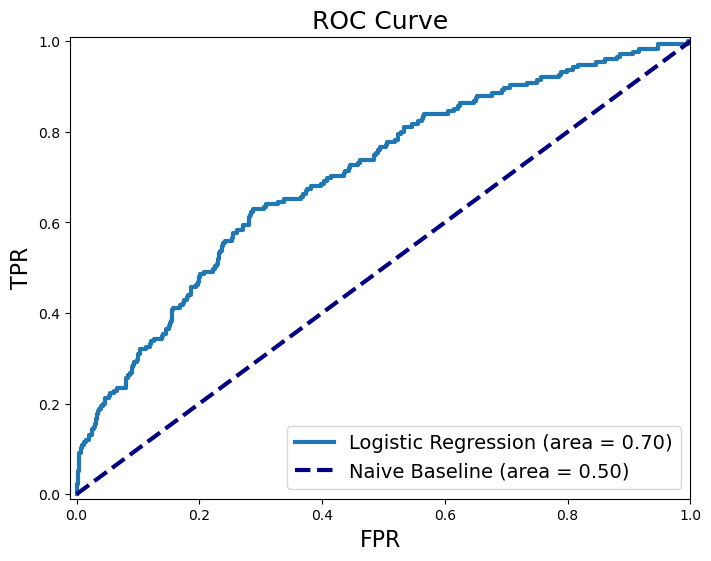

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

This ROC curve evaluate this logistic regression model preformance with different threshold. By examining the curve, decision-makers can select an appropriate threshold that balances TPR and FPR based on economic considerations. The area under the curve (AUC) for this model in the test set is 0.70, indicating that this model has a reasonable discriminative ability but still need to be improved. So, except considering the economic cost, the decision-makers can use ROC curve to look for other possible medications for preventing CHD so that the AUC of other model can closer to 1. 

### Part c

In the part a, we have the threshold $p = 0.126$, which is to determine the high risk of developing CHD. We consider the patients who will have CHD with taking medication or without. If a patient chooses to take the medication, the risk of developing CHD is 0.15p, and the cost of decreased quality of life is 500,000, so the total cost is $0.15p \times (500,000+C)$. If a patient chooses to take the mdeication but does not develop CHD at the end, the cost will be $(1-0.15p)\times C$. If a patient chooses to not take the medication, the risk of developing CHD is the same p, and the cost will be $p \times 500,000$. Plug 0.126 as p into the equation will be $0.15 \times 0.126 \times (500,000+C) + (1-0.15\times 0.126)\times C = 0.126 \times 500,000$, $C = 53,550$.

### Part d

Yes. One concern is that patient's right to choose will be violated if predictive models are only used to determine who should receive medication. The predictions given by logistic regression models are based on data, but the conditions of model prediction are not transparent. If we make decisions only based on models, we risk oversimplifying individual cases without taking into account each patient's unique circumstances.One way to address this concern is to use predictive models as tools instead of decision makers. Instead of letting the predictive model simply dictate the course of treatment, use it as a tool to inform discussions. The model can be used to provide information for treatment, but final decisions should be made based on individual patient analysis and discussions of risks and benefits with the patient.